In [2]:
# To add a new cell, type '#%%'
# To add a new markdown cell, type '#%% [markdown]'
#%% Change working directory from the workspace root to the ipynb file location. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '../../bootcamp/Projects/Project-1'))
	print(os.getcwd())
except:
	pass
#%% [markdown]
# # Goals for Chris 
# 1. Have gun deaths by assault weapons/rifles/large weapons increased? 
# 2. Does race play a factor in suicide by gun?

#%%



#%%
#importations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches




In [3]:
#%%
df_cleaned = pd.read_csv('Deats_coded.csv')
df_cleaned.head()
#list all ICD 10 codes
df_cleaned['ICD10'].value_counts()


#%%
#create list of ICD 10 codes associated with large guns
large_guns = ['X73', 'X94', 'W33', 'Y23']
#create an expression that has each ICD10 as a possible condition
large_guns_regex = '|' .join(large_guns)


df_bguns = df_cleaned[df_cleaned['ICD10'].str.contains(large_guns_regex)]


#%%
#visualize our value counts to show that the data worked
df_bguns['ICD10'].value_counts()




X73    8667
X94    1519
W33     174
Y23      71
Name: ICD10, dtype: int64

In [4]:
#%%
df_bguns.columns
#group by year and ICD10 count, resetting index to keep column names available
bgun_year_cat = df_bguns.groupby(['Data_Year', 'ICD10']).count().reset_index()
#rename column
bgun_year_cat = bgun_year_cat.rename(columns={"Unnamed: 0": "Number of Deaths"})


#%%
bgun_year_cat


#%%



#%%
bgun_year_total = df_bguns.groupby(['Data_Year']).count().reset_index()
bgun_year_total.head()
bgun_year_total = bgun_year_total.rename(columns = {'Unnamed:0' : 'Number of Deaths'})
bgun_year_total = bgun_year_total.rename(columns = {'Unnamed: 0' : 'Number of Deaths'})
bgun_year_total.head()

,Data_Year,Number of Deaths,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10
0,2015,3475,3475,3475,3475,3475,3475,3475,3475,3475,3475,3472,3475,3475,3475,3475,3475,3475
1,2016,3491,3491,3491,3491,3491,3491,3491,3491,3491,3491,3490,3491,3491,3491,3491,3491,3491
2,2017,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465


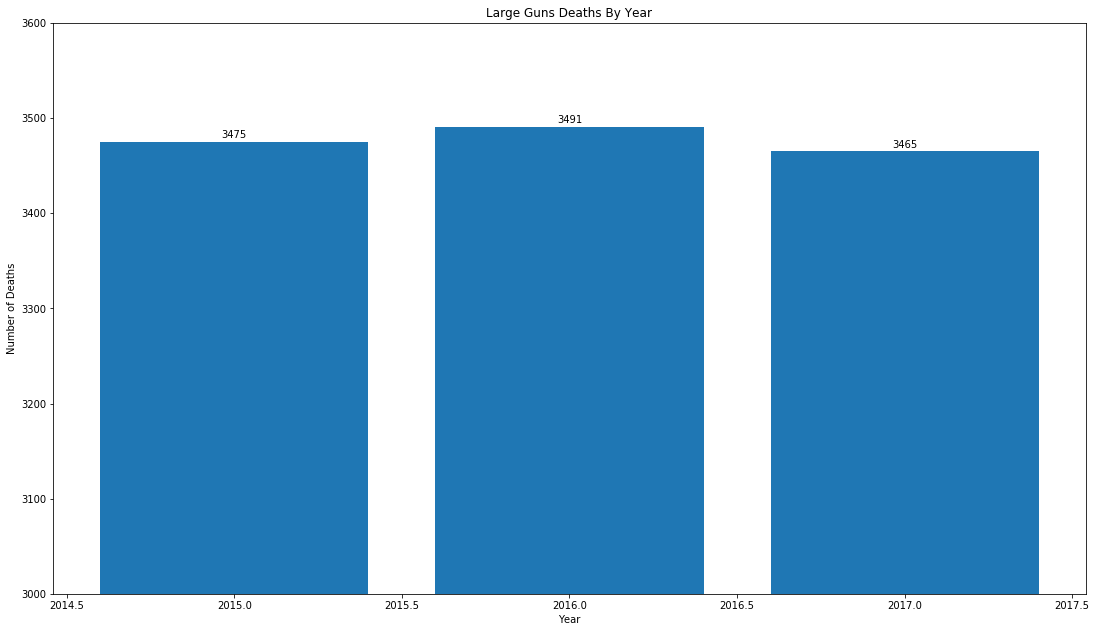

In [5]:
#--------------------bar graph of the number of deaths
#create axis

x_axis = bgun_year_total['Data_Year']
y_axis = bgun_year_total['Number of Deaths']
colors = np.array(["blue"])




fig, ax = plt.subplots()
def autolabel(rects):
   
   for rect in rects:
       height = rect.get_height()
       ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 2),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom')
rect=ax.bar(x_axis, y_axis, color='r', width=0.35 , align="center")
autolabel(rect)


# Plot
plt.bar(x_axis, y_axis)
plt.title('Large Guns Deaths By Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.ylim(bottom = 3000, top = 3600)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
fig.savefig("Large-gun-deaths-year.png", dpi = 200)

#--------------------bar graph of the number of deaths

#%%

In [6]:
#%%
#conduct Chi-Square with the years of the biggest difference
# Observed data in a (hypothetical) year where deaths are the same for each year
total = bgun_year_total["Number of Deaths"].sum()
deaths_by_year = bgun_year_total["Number of Deaths"]
print (total)
observed = pd.Series([deaths_by_year[0], deaths_by_year[1], deaths_by_year[2]], index=["2015", "2016", "2017"])
df = pd.DataFrame([observed]).T
df[1] = total/3
df.columns = ["observed", "expected"]
critical_value = stats.chi2.ppf(q = 0.95, df = 2)


#%%
# Run the chi square test with stats.chisquare()
stats.chisquare(df['observed'], df['expected'])

10431


Power_divergenceResult(statistic=0.0989358642507909, pvalue=0.9517356777874814)

In [7]:

#%%
#pivot table for breakdown by ICD10 code
by_death_pivot = bgun_year_cat.pivot(index = "Data_Year", columns="ICD10").reset_index()
by_death_pivot

Data_Year Number of Deaths                Resident_Status             \
ICD10                        W33   X73  X94 Y23             W33   X73  X94   
0          2015               64  2910  475  26              64  2910  475   
1          2016               56  2892  522  21              56  2892  522   
2          2017               54  2865  522  24              54  2865  522   

          Month_Of_Death  ... Race     Hispanic_Origin                 \
ICD10 Y23            W33  ...  X94 Y23             W33   X73  X94 Y23   
0      26             64  ...  475  26              64  2910  475  26   
1      21             56  ...  522  21              56  2892  522  21   
2      24             54  ...  522  24              54  2865  522  24   

      Causes_of_Death                 
ICD10             W33   X73  X94 Y23  
0                  64  2910  475  26  
1                  56  2892  522  21  
2                  54  2865  522  24  

[3 rows x 65 columns]

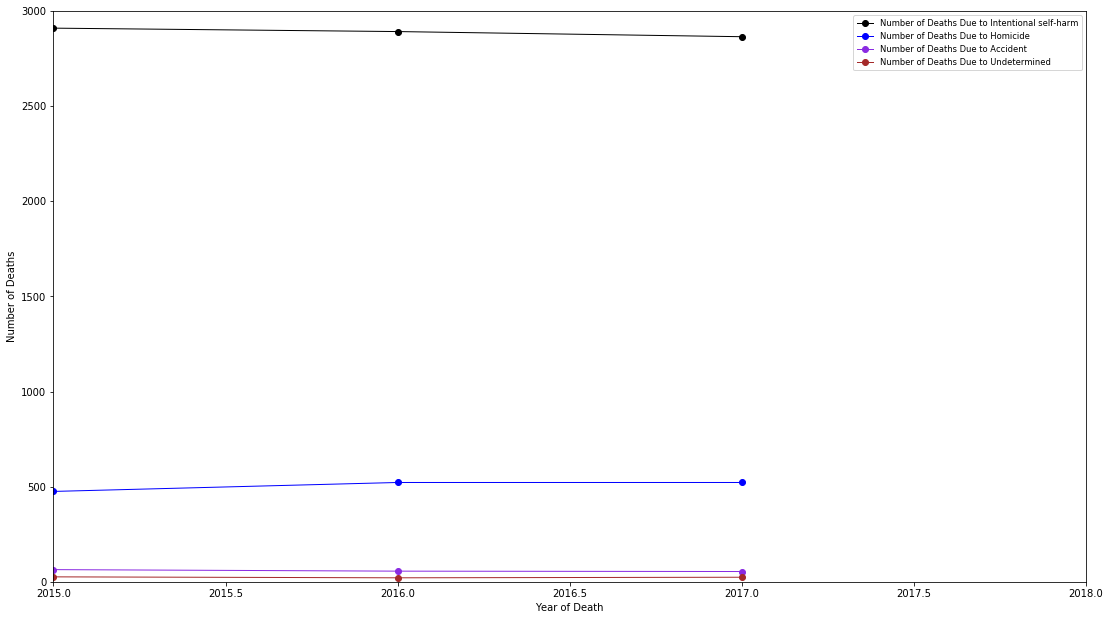

<Figure size 16000x8000 with 0 Axes>

In [8]:

#plot line graph for total number of deaths, then broken down by ICD10

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

#create timepoints list 
timepoints = [2015, 2016, 2017]


#create list of standard error of the means for each drug by time 
#create list of each mean for each drug by time 

codes = ['X73',
         'X94',
         'W33',
         'Y23',]

colors = ['#000000', 
          '#0000FF',
          '#8A2BE2',
          '#A52A2A',]

descriptions = ['Intentional self-harm',
             'Homicide',
             'Accident',
             'Undetermined']


#set figure size, limits, and labels
ax.set_xlabel("Year of Death")
ax.set_ylabel("Number of Deaths")
ax.set_xlim(2015, 2018)
ax.set_ylim(0, 3000)
fig.set_size_inches(18.5, 10.5, forward=True)



#loop through list of each drugs and plot with corresponding color using zip function
for code, color, description in zip(codes, colors, descriptions):

    #get number of deaths for each code
    death_code = by_death_pivot['Number of Deaths'][code].tolist()
    #generate legend description 
    description = "Number of Deaths Due to " + str(description) 
    #ax.errorbar(timepoints, means, yerr=sem, fmt='o', color = color, marker='s', label=description)
    #create actual plot
    plt.plot(timepoints, death_code, linewidth=1, color = color, label=description, marker='o')
    
    

plt.legend(loc="best", fontsize="small", fancybox=True)
figure(num=None, figsize=(160, 80), dpi=100, facecolor='w', edgecolor='k')




# Save the Figure
fig.savefig("Large-gun-deaths-by-manner-of-death.png", dpi = 200)

In [9]:
#%%
#conduct Chi-Square for the two largest categories, suicide and homicide
# Observed data in a (hypothetical) year where deaths are the same for each year
total_suicide = by_death_pivot["Number of Deaths"]['X73'].sum()
deaths_by_year = by_death_pivot["Number of Deaths"]['X73']
print (total_suicide)
deaths_by_year
observed = pd.Series([deaths_by_year[0], deaths_by_year[1], deaths_by_year[2]], index=["2015", "2016", "2017"])
df = pd.DataFrame([observed]).T
df[1] = total_suicide/3
df.columns = ["observed", "expected"]
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
print(df)
stats.chisquare(df['observed'], df['expected'])


#%%
#conduct Chi-Square for the two largest categories, suicide and homicide
# Observed data in a (hypothetical) year where deaths are the same for each year
total_homicide = by_death_pivot["Number of Deaths"]['X94'].sum()
deaths_by_year = by_death_pivot["Number of Deaths"]['X94']
print (total_homicide)
deaths_by_year
observed = pd.Series([deaths_by_year[0], deaths_by_year[1], deaths_by_year[2]], index=["2015", "2016", "2017"])
df = pd.DataFrame([observed]).T
df[1] = total_homicide/3
df.columns = ["observed", "expected"]
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
print(df)
stats.chisquare(df['observed'], df['expected'])



8667
      observed  expected
2015      2910    2889.0
2016      2892    2889.0
2017      2865    2889.0
1519
      observed    expected
2015       475  506.333333
2016       522  506.333333
2017       522  506.333333


Power_divergenceResult(statistic=2.9084924292297565, pvalue=0.23357636400916326)

In [10]:

#%%
df_cleaned = pd.read_csv('Recoded-Race.csv')
df_cleaned.head()
#list all ICD 10 codes
df_cleaned["Race-Simplified"].value_counts()


#%%
#create list of ICD 10 codes associated with suicide
suicide_guns = ['X74', 'X73', 'X72']
#create an expression that has each ICD10 as a possible condition
suicide_guns_regex = '|' .join(suicide_guns)


#%%
df_suicide = df_cleaned[df_cleaned['ICD10'].str.contains(suicide_guns_regex)]
#visualize our value counts to show that the data worked
df_suicide['ICD10'].value_counts()
df_suicide.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Resident_Status', 'Month_Of_Death',
       'Sex', 'Age', 'Age_Group', 'Place_Of_Death', 'Marital_Status',
       'DOW_of_Death', 'Data_Year', 'Injured_At_Work', 'Manner_Of_Death',
       'Activity_Code', 'Place_Of_Causal_Injury', 'Race', 'Hispanic_Origin',
       'Causes_of_Death', 'ICD10', 'Race-Simplified', 'ICD10-Description'],
      dtype='object')

In [11]:
#%%
#group by year and Race, resetting index to keep column names available
suicide_year_cat = df_suicide.groupby(['Data_Year', 'Race']).count().reset_index()
#rename column
suicide_year_cat = suicide_year_cat.rename(columns={"Unnamed: 0": "Number of Deaths"})


#%%
#visualize data
suicide_year_cat

df_suicide_total = df_suicide.groupby(['Data_Year']).count().reset_index()
df_suicide_total = df_suicide_total.rename(columns = {'Unnamed: 0' : 'Number of Deaths'})


#%%
#visualize dataframe without grouping
df_suicide_total.columns

Index(['Data_Year', 'Number of Deaths', 'Unnamed: 0.1', 'Resident_Status',
       'Month_Of_Death', 'Sex', 'Age', 'Age_Group', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Injured_At_Work', 'Manner_Of_Death',
       'Activity_Code', 'Place_Of_Causal_Injury', 'Race', 'Hispanic_Origin',
       'Causes_of_Death', 'ICD10', 'Race-Simplified', 'ICD10-Description'],
      dtype='object')

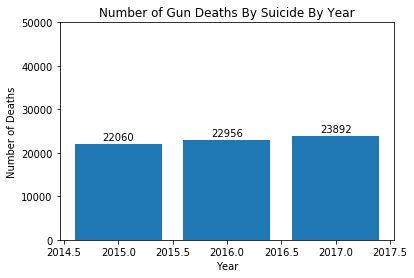

In [12]:
#%%
#create axis

x_axis = df_suicide_total['Data_Year']
y_axis = df_suicide_total['Number of Deaths']
colors = np.array(["blue"])

fig, ax = plt.subplots()
def autolabel(rects):
   
   for rect in rects:
       height = rect.get_height()
       ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 2),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom')
rect=ax.bar(x_axis, y_axis, color='r', width=0.35 , align="center")
autolabel(rect)


# Plot
plt.bar(x_axis, y_axis)
plt.title('Number of Gun Deaths By Suicide By Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.ylim(bottom = 0, top = 50000)
fig = plt.gcf()
fig.set_size_inches(6, 4, forward=True)
fig.savefig("Gun-deaths-suicide.png", dpi =200)

In [13]:



#%%
#conduct Chi-Square with the years of the biggest difference
# Observed data in a (hypothetical) year where deaths are the same for each year
total = df_suicide_total["Number of Deaths"].sum()
deaths_by_year = df_suicide_total["Number of Deaths"]
print (total)
observed = pd.Series([deaths_by_year[0], deaths_by_year[1], deaths_by_year[2]], index=["2015", "2016", "2017"])
df = pd.DataFrame([observed]).T
df[1] = total/3
df.columns = ["observed", "expected"]
critical_value = stats.chi2.ppf(q = 0.95, df = 2)

# Run the chi square test with stats.chisquare()
stats.chisquare(df['observed'], df['expected'])
#we can conlcude based on a chi-square test that the number of deaths by suicide has increased and is
#statistically significant

68908


Power_divergenceResult(statistic=73.07041272421199, pvalue=1.3581929809779631e-16)

In [14]:



#%%
#pivot table for breakdown by ICD10 code
suicide_year_cat = df_suicide.groupby(['Data_Year', 'Race-Simplified']).count().reset_index()
suicide_year_cat.columns
#drop unnecessary frames
suicide_year_cat = suicide_year_cat.drop(['Month_Of_Death', 'Resident_Status', 'Sex', 'Age', 'Age_Group', 'Place_Of_Death', 
                                          'Marital_Status', 'DOW_of_Death', 'Injured_At_Work', 'Manner_Of_Death' ,'Activity_Code',  'Place_Of_Causal_Injury' ,'Hispanic_Origin', 'Causes_of_Death', 'ICD10'], axis=1)
suicide_year_cat
race_pivot = suicide_year_cat.pivot(index = "Data_Year", columns="Race-Simplified").reset_index()
race_pivot = race_pivot.rename(columns={"Unnamed: 0": "Number of Deaths"})
race_pivot["Number of Deaths"]



Race-Simplified,American Indian,Asian,Asian or Pacific Islander,Black,Hispanic,White
0,200,213,81,1142,1053,19371
1,204,219,120,1361,1136,19916
2,232,234,140,1457,1233,20596


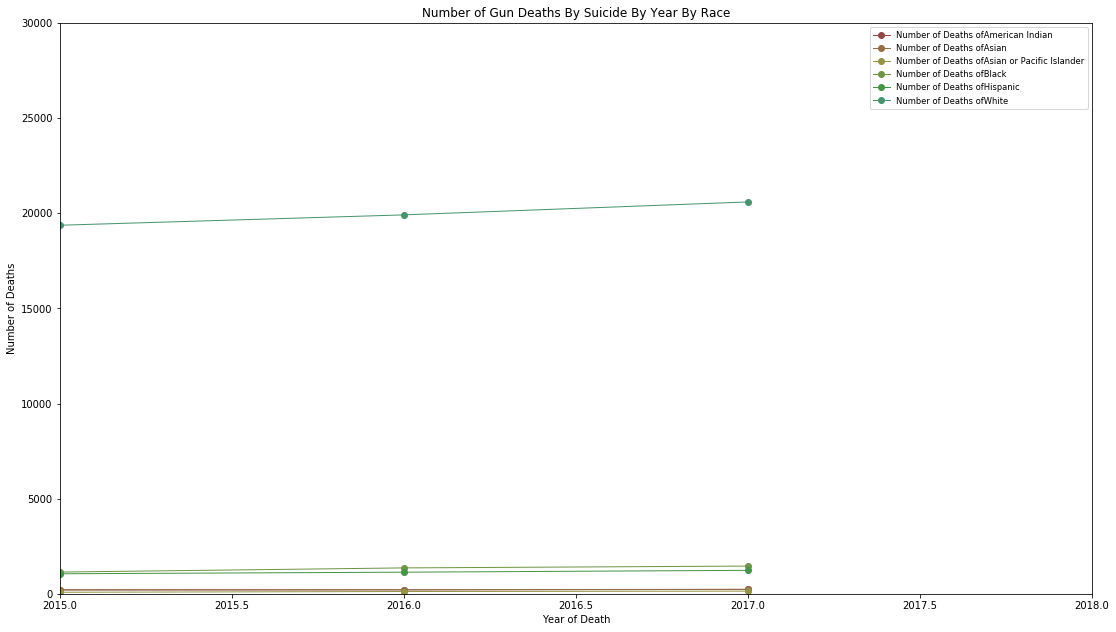

<Figure size 48000x24000 with 0 Axes>

In [15]:


#%%
#plot line graph for total number of deaths, then broken down by Race

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

#create timepoints list 
timepoints = [2015, 2016, 2017]



races = ['American Indian',
         'Asian',
         'Asian or Pacific Islander',
         'Black',
        'Hispanic',
         'White']

colors = ['#954646', 
          '#956E46',
          '#959546',
          '#6E9546',
         '#469546',
         '#46956E']

descriptions = ['American Indian',
                 'Asian',
                 'Asian or Pacific Islander',
                 'Black',
                 'Hispanic',
                 'White']


#set figure size, limits, and labels
ax.set_xlabel("Year of Death")
ax.set_ylabel("Number of Deaths")
ax.set_xlim(2015, 2018)
ax.set_ylim(0, 30000)
fig.set_size_inches(18.5, 10.5, forward=True)



#loop through list of each drugs and plot with corresponding color using zip function
for race, color, description in zip(races, colors, descriptions):

    #get number of deaths for each code
    death_race = race_pivot['Number of Deaths'][race].tolist()
    #generate legend description 
    description = "Number of Deaths of" + str(description) 
    #create actual plot
    plt.plot(timepoints, death_race, linewidth=1, color = color, label=description, marker='o')
    
    
plt.title('Number of Gun Deaths By Suicide By Year By Race')
plt.legend(loc="best", fontsize="small", fancybox=True)
figure(num=None, figsize=(160, 80), dpi=300, facecolor='w', edgecolor='k')

plt.show()
fig.savefig("Gun-deaths-suicide-race.png", dpi =200)

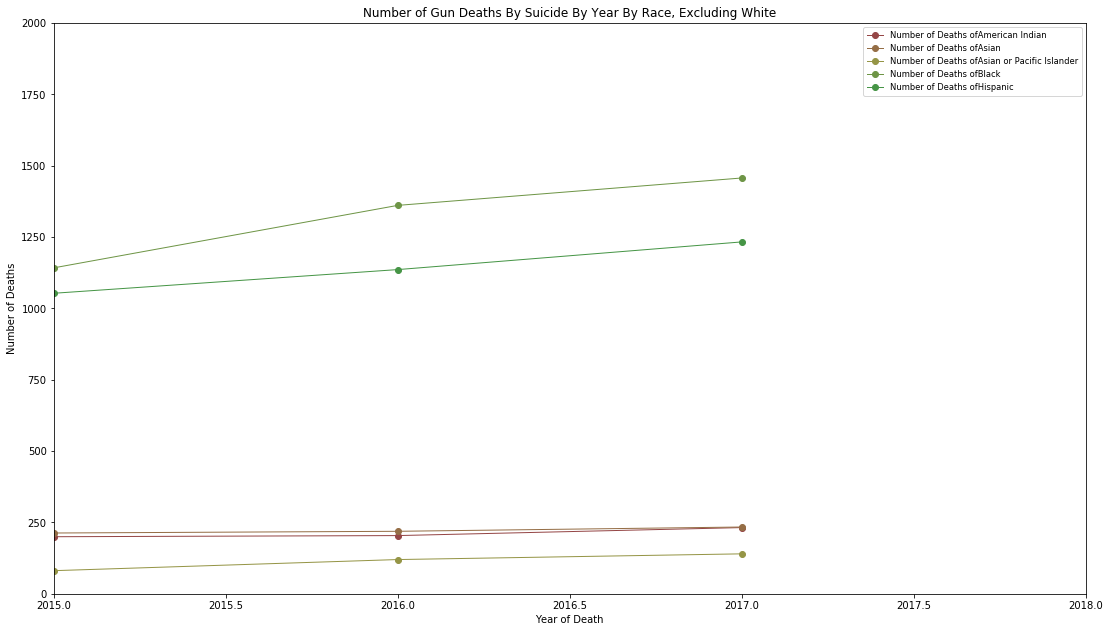

<Figure size 48000x24000 with 0 Axes>

In [16]:



#%%
#same graph but without white ethnicity
#plot line graph for total number of deaths, then broken down by Race

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

#create timepoints list 
timepoints = [2015, 2016, 2017]



races = ['American Indian',
         'Asian',
         'Asian or Pacific Islander',
         'Black',
        'Hispanic',]

colors = ['#954646', 
          '#956E46',
          '#959546',
          '#6E9546',
         '#469546',]

descriptions = ['American Indian',
                 'Asian',
                 'Asian or Pacific Islander',
                 'Black',
                 'Hispanic',]


#set figure size, limits, and labels
ax.set_xlabel("Year of Death")
ax.set_ylabel("Number of Deaths")
ax.set_xlim(2015, 2018)
ax.set_ylim(0, 2000)
fig.set_size_inches(18.5, 10.5, forward=True)



#loop through list of each drugs and plot with corresponding color using zip function
for race, color, description in zip(races, colors, descriptions):

    #get number of deaths for each code
    death_race = race_pivot['Number of Deaths'][race].tolist()
    #generate legend description 
    description = "Number of Deaths of" + str(description) 
    #create actual plot
    plt.plot(timepoints, death_race, linewidth=1, color = color, label=description, marker='o')
    
    
plt.title('Number of Gun Deaths By Suicide By Year By Race, Excluding White')
plt.legend(loc="best", fontsize="small", fancybox=True)
figure(num=None, figsize=(160, 80), dpi=300, facecolor='w', edgecolor='k')
fig.savefig("Gun-deaths-suicide-race-no-white.png", dpi =200)
plt.show()




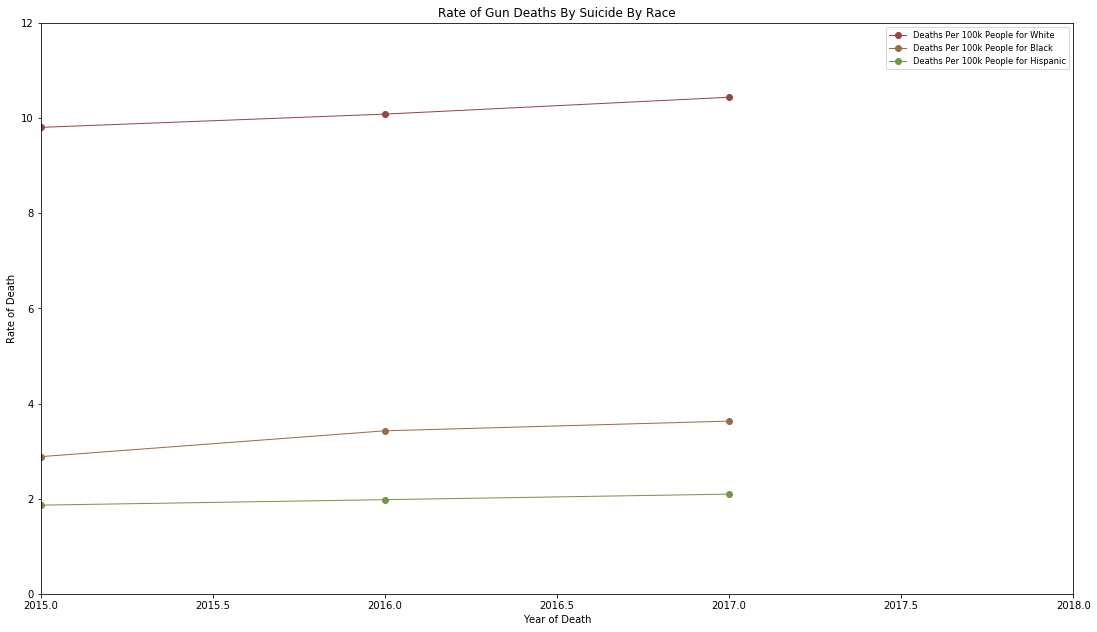

<Figure size 48000x24000 with 0 Axes>

The test for white death rate vs hispanic death rate is statistically significantTtest_indResult(statistic=0.0, pvalue=1.0)
The test for white death rate vs black death rate is statistically significantTtest_indResult(statistic=-5.7361192539804104, pvalue=0.019696985270141125)


In [17]:
#%%
#to compare the death rates better, we will calculate the crude death rates per 100k people for the top three largest categories,
#the top three largest counts are white, black, and hispanic
#data source: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_12_1YR_DP05&prodType=table

#create dictionary of race and population
data = {'Race': ['White-Alone', 'Black', 'Hispanic'], 'Pop-2015': [197534496, 39597600, 56496122],}
pop_2016 = [197479450, 39717127, 57398719]
pop_2017 = [197285202, 40129593, 58846134]
df_rates = pd.DataFrame(data) 
df_rates["Pop-2016"] = pop_2016
df_rates["Pop-2017"] = pop_2017
deaths_15 = ['19371', '1142', '1053']
deaths_16 = ['19916', '1361', '1136']
deaths_17 = ['20596', '1457', '1233']

df_rates["Deaths-15"] = deaths_15
df_rates["Deaths-16"] = deaths_16
df_rates["Deaths-17"] = deaths_17

df_rates["Rate-15"] = 100000 * df_rates["Deaths-15"].astype(int) / df_rates["Pop-2015"].astype(int)
df_rates["Rate-16"] = 100000 * df_rates["Deaths-16"].astype(int) / df_rates["Pop-2016"].astype(int)
df_rates["Rate-17"] = 100000 * df_rates["Deaths-17"].astype(int) / df_rates["Pop-2017"].astype(int)
df_rates


#%%
df_rates
rates_white = df_rates.values.tolist()[0][7:10]
rates_black = df_rates.values.tolist()[1][7:10]
rates_hispanic = df_rates.values.tolist()[2][7:10]
rates_hispanic


#%%
#same graph but without white ethnicity
#plot line graph for total number of deaths, then broken down by Race

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

#create timepoints list 
timepoints = [2015, 2016, 2017]



races = ['White',
         'Black',
        'Hispanic']

colors = ['#954646', 
          '#956E46',
          '#759546']

descriptions = ['White',
         'Black',
        'Hispanic']


#set figure size, limits, and labels
ax.set_xlabel("Year of Death")
ax.set_ylabel("Rate of Death")
ax.set_xlim(2015, 2018)
ax.set_ylim(0, 12)
fig.set_size_inches(18.5, 10.5, forward=True)



#loop through list of each drugs with iterator variable
for i in range(0,3):

    #get number of deaths for each code
    death_race = rates_white = df_rates.values.tolist()[i][7:10]
    #generate legend description 
    description = "Deaths Per 100k People for " + str(descriptions[i]) 
    #create actual plot
    plt.plot(timepoints, death_race, linewidth=1, color = colors[i], label=description, marker='o')
    
    
plt.title('Rate of Gun Deaths By Suicide By Race')
plt.legend(loc="best", fontsize="small", fancybox=True)
figure(num=None, figsize=(160, 80), dpi=300, facecolor='w', edgecolor='k')
fig.savefig("Gun-deaths-suicide-rates-top-3.png", dpi =200)
plt.show()


#%%
#two sample t test for whites vs black and white vs hispanic
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
result = stats.ttest_ind(rates_white, rates_hispanic, equal_var=False)
result_2 = stats.ttest_ind(rates_white, rates_black, equal_var=False)

print (f"The test for white death rate vs hispanic death rate is statistically significant{result}")
print (f"The test for white death rate vs black death rate is statistically significant{result_2}")


#%%



# Cong Tran's Work

In [18]:
#%%
guns_15 = pd.read_csv("./Resources/2015_all_gun_deaths.csv",low_memory=False)
guns_16 = pd.read_csv("./Resources/2016_all_gun_deaths.csv",low_memory=False)
guns_17 = pd.read_csv("./Resources/2017_all_gun_deaths.csv",low_memory=False)


#%%



#%%
#Create DataFrames for each year's mortality data file
guns_15_df=pd.DataFrame(guns_15)
guns_16_df=pd.DataFrame(guns_16)
guns_17_df=pd.DataFrame(guns_17)

In [19]:
#Drop the unwanted columns
guns_15_dfc=guns_15_df[['Resident_Status','Month_Of_Death','Sex','Age_Value','Age_Recode_12','Place_Of_Death', 'Marital_Status', 'DOW_of_Death', 'Data_Year','Injured_At_Work', 'Manner_Of_Death','Activity_Code',
'Place_Of_Causal_Injury','Race','Hispanic_Origin_Recode','Cause_Recode_358','ICD10']]
guns_16_dfc=guns_16_df[['Resident_Status','Month_Of_Death','Sex','Age_Value','Age_Recode_12','Place_Of_Death', 'Marital_Status', 'DOW_of_Death', 'Data_Year','Injured_At_Work', 'Manner_Of_Death','Activity_Code',
'Place_Of_Causal_Injury','Race','Hispanic_Origin_Recode','Cause_Recode_358','ICD10']]
guns_17_dfc=guns_17_df[['Resident_Status','Month_Of_Death','Sex','Age_Value','Age_Recode_12','Place_Of_Death', 'Marital_Status', 'DOW_of_Death', 'Data_Year','Injured_At_Work', 'Manner_Of_Death','Activity_Code',
'Place_Of_Causal_Injury','Race','Hispanic_Origin_Recode','Cause_Recode_358','ICD10']]


#Concate the data for 3 years
guns_deaths_df=pd.concat([guns_15_dfc,guns_16_dfc,guns_17_dfc],axis=0)

#remove the spaces from teh columns in entire dataframe
guns_deaths_df = guns_deaths_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
#Check the details for the combined dataframe
guns_deaths_df['ICD10'].value_counts()

X74     42125
X95     37419
X72     18116
X73      8667
X93      3126
Y350     1560
X94      1519
W34      1027
Y24       728
W32       271
W33       174
Y22       124
Y23        71
Y355       69
Y356       61
Y357        7
Y351        1
Name: ICD10, dtype: int64

In [20]:
#######
#Rename columns
guns_deaths_df=guns_deaths_df.rename(columns={"Age_Value":"Age","Age_Recode_12":"Age_Group","Cause_Recode_358":"Causes_of_Death",
                                              "Hispanic_Origin_Recode":"Hispanic_Origin"})


#%%
#Decoding the column values in the Dataframe
#######
#Column 'Resident_Status'
guns_deaths_df=guns_deaths_df.replace({'Resident_Status':{1:'Residents',2:'Intra_state_NR',3:'Inter_state_NR',4:'Foreign_Residents'}})

#Column 'Month_Of_Death'
guns_deaths_df=guns_deaths_df.replace({'Month_Of_Death':{101:'January',1:'January',102:'February',2:'February',103:'March',3:'March',104:'April',
4:'April',105:'May',5:'May',106:'June',6:'June',107:'July',7:'July',108:'August',8:'August',109:'September',9:'September',110:'October',10:'October',
111:'November',11:'November',112:'December',12:'December'}})

#column 'Age_Recode_12' or 'Age Group'
guns_deaths_df=guns_deaths_df.replace({'Age_Group':{1:'<1',2:'1 - 4',3:'5 - 14',4:'15 - 24',5:'25 - 34',6:'35 - 44',7:'45 - 54',8:'55 - 64',9:'65 - 74',10:'75 - 84',11:'>85',12:'Unknown'}})

# column 'Cause_Recode_358' or 'Causes_of_Death'
guns_deaths_df=guns_deaths_df.replace({"Causes_of_Death":{429:'suicide by firearms',435:'Assault (homicide) by discharge of firearms',451:'legal intervention',407:'Accidental discharge of firearms',446:'Discharge of firearms',450:'Legal intervention'}})

#column 'ICD10'
guns_deaths_df=guns_deaths_df.replace({'ICD10':{' X72':'suicide by handgun',' X74':'suicide by other & unspecified firearm', 
    ' X95':'Assault by other & unspecified firearm', 
' X73':'suicide by by rifle, shotgun & larger firearm', 
' Y24':'Other & unspecified firearm undetermined intent',
' X94':'Assault by rifle, shotgun & larger firearm',
' Y22':'Handgun discharge undetermined intent', 
' X93':'Assault by handgun',
' W34':'Accidental discharge of other and unspecified firearms', 
' W32':'Accidental discharge of Handgun', 
' Y350': 'legal intervention', 
' W33':'Accidental discharge of Rifle, shotgun and larger firearm', 
' Y23': 'Rifle shotgun & larger firearm undetermined intent', 
' Y356':'legal intervention', 
' Y355':'legal intervention', 
' Y357':'legal intervention',
' Y351':'undetermined intent'}})
#column 'Hispanic_Origin_Recode' or 'Hispanic_Origin'
guns_deaths_df=guns_deaths_df.replace({'Hispanic_Origin':{1:'Mexican',2:'Puerto Rican',3:'Cuban',4:'Central or South American',5:'Other or unknown Hispanic',6:'Non - Hispanic white',7:'Non - Hispanic black',8:'Non - Hispanic other races',9:'Hispanic origin unknown'}})

guns_deaths_df.head(10)

,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,Data_Year,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10
0,Residents,January,M,48,45 - 54,4,M,7,2015,N,2,9,0,1,Non - Hispanic white,suicide by firearms,X72
1,Residents,January,F,19,15 - 24,7,S,3,2015,N,2,9,8,1,Non - Hispanic white,suicide by firearms,X72
2,Residents,January,M,33,25 - 34,4,M,1,2015,N,2,9,0,1,Non - Hispanic white,suicide by firearms,X74
3,Inter_state_NR,January,F,23,15 - 24,2,S,3,2015,N,3,9,0,2,Non - Hispanic black,Assault (homicide) by discharge of firearms,X95
4,Residents,January,F,40,35 - 44,7,D,3,2015,N,2,9,9,1,Non - Hispanic white,suicide by firearms,X72
5,Residents,January,M,18,15 - 24,2,S,1,2015,N,3,9,8,1,Non - Hispanic white,Assault (homicide) by discharge of firearms,X95
6,Residents,January,M,41,35 - 44,2,M,1,2015,N,2,9,0,1,Non - Hispanic white,suicide by firearms,X72
7,Residents,January,M,20,15 - 24,7,S,5,2015,N,3,9,8,1,Puerto Rican,Assault (homicide) by discharge of firearms,X95
8,Residents,January,M,72,65 - 74,4,U,6,2015,N,2,9,0,1,Non - Hispanic white,suicide by firearms,X72
9,Inter_state_NR,January,M,30,25 - 34,7,M,7,2015,N,2,9,9,1,Non - Hispanic white,suicide by firearms,X74


In [21]:
#%%
#column 'Place_Of_Death'
guns_deaths_df=guns_deaths_df.replace({'Place_Of_Death':{1:'Inpatient Hospital',2:'Outpatient Hospital',3:'Dead on Arrival Hospital',4:'Decendents Home',5:'Hospice Facility',6:'Nursing Home',7:'Other',9:'Unknown'}})

#column 'DOW_of_Death'
guns_deaths_df=guns_deaths_df.replace({'DOW_of_Death':{1:'Sunday',2:'Monday',3:'Tuesday',4:'Wednesday',5:'Thursday',6:'Friday',7:'Saturday',9:'Unknown'}})


#column 'Manner_Of_Death'
guns_deaths_df=guns_deaths_df.replace({'Manner_Of_Death':{'1':'Accident',
                                                '2':'Suicide',
                                                '3':'Homicide',
                                                '4':'Pending investigation',
                                                '5':'Could not determine',
                                                '6':'Self Inflicted',
                                                '7':'Natural',
                                                ' ':'Unknown'
                                               }})

#column 'Activity_Code'
guns_deaths_df=guns_deaths_df.replace({'Activity_Code':{'0':'Sports',
                                                '1':'Leisure',
                                                '2':'Working for income',
                                                '3':'Work - Other',
                                                '4':'Vital Activity',
                                                '8':'Other Activity',
                                                '9':'Other Activity',
                                                ' ':'Unknown'
                                               }})


#%%
#column 'Place_Of_Causal_Injury'
guns_deaths_df=guns_deaths_df.replace({'Place_Of_Causal_Injury':{'0':'Home',
                                                '1':'Residential Institution',
                                                '2':'School/Public Administrative area',
                                                '3':'Sports area',
                                                '4':'Street and Highway',
                                                '5':'Trade and Service',
                                                '6':'Industrial and Construction',
                                                '7':'Farm',
                                                '8':'Other Places',
                                                '9':'Other Places',
                                                ' ':'Unknown'
                                               }})
guns_deaths_df.head()


#%%
#column 'Race' 
guns_deaths_df=guns_deaths_df.replace({'Race' : {1:'White',2:'Black',3:'American Indian',4:'Chinese',
                                                5:'Japanese',6:'Hawaiian',7:'Filipino',18:'Asian Indian',
                                                28:'Korean',38:'Samoan',48:'Vietnamese',58:'Guamanian',
                                                68:'Asian or Pacific Islander',78:'Asian or Pacific Islander'
                                               }})

guns_deaths_df.head()




,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,Data_Year,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10
0,Residents,January,M,48,45 - 54,Decendents Home,M,Saturday,2015,N,Suicide,Other Activity,Home,White,Non - Hispanic white,suicide by firearms,X72
1,Residents,January,F,19,15 - 24,Other,S,Tuesday,2015,N,Suicide,Other Activity,Other Places,White,Non - Hispanic white,suicide by firearms,X72
2,Residents,January,M,33,25 - 34,Decendents Home,M,Sunday,2015,N,Suicide,Other Activity,Home,White,Non - Hispanic white,suicide by firearms,X74
3,Inter_state_NR,January,F,23,15 - 24,Outpatient Hospital,S,Tuesday,2015,N,Homicide,Other Activity,Home,Black,Non - Hispanic black,Assault (homicide) by discharge of firearms,X95
4,Residents,January,F,40,35 - 44,Other,D,Tuesday,2015,N,Suicide,Other Activity,Other Places,White,Non - Hispanic white,suicide by firearms,X72


In [22]:
#%%
x_axis= np.arange(len(guns_deaths_df['Causes_of_Death'].unique()))
tick_locations = [values for values in x_axis]
x_axis


#%%
y_axis = guns_deaths_df.groupby('Causes_of_Death')
count_y_axis = y_axis['Causes_of_Death'].count()
count_y_axis


#%%
labels=['Accidental discharge of firearms',
       'Assault (homicide) by discharge of firearms',
       'Discharge of firearms','Legal intervention' ,
       'legal intervention ','suicide by firearms']
year_2015=[1472,42064,923,69,1629,68908]
year_2016=[2014,45215,856,98,3521,71253]
year_2017=[3562,53256,968,123,1526,78623]

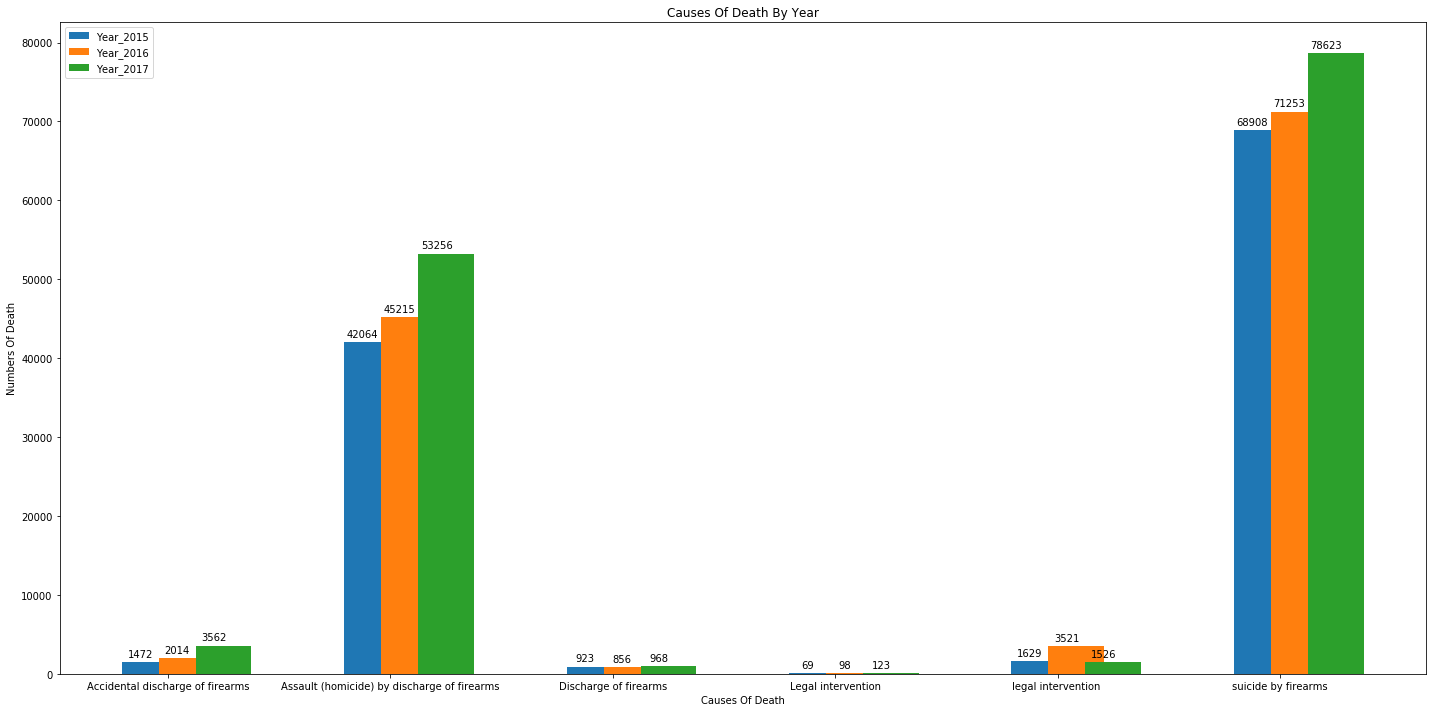

In [23]:
x= np.arange(len(labels))
width = 0.25

fig, ax= plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/3, year_2015, width, label='Year_2015')
rects2 = ax.bar(x + width/3, year_2016, width, label='Year_2016')
rects3 = ax.bar(x + (width), year_2017, width, label='Year_2017')

ax.set_ylabel('Numbers Of Death')
ax.set_title('Causes Of Death By Year')
ax.set_xlabel('Causes Of Death')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width()/ 3, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


fig.tight_layout()
plt.show()
fig.savefig('vijay-causes-of-death-year.png', dpi = 200)

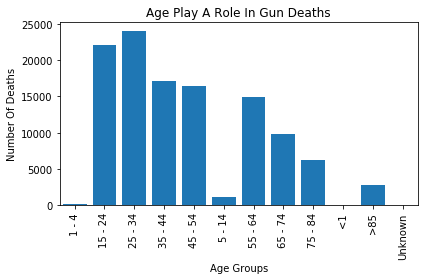

In [24]:
#%%
x_axis= np.arange(len(guns_deaths_df['Age_Group'].unique()))
tick_locations = [values for values in x_axis]
x_axis


#%%
y_axis = guns_deaths_df.groupby('Age_Group')
count_y_axis = y_axis['Age_Group'].count()
count_y_axis


#%%
plt.bar(x_axis,count_y_axis )
count_y_axis.plot(kind="bar")
plt.title("Age Play A Role In Gun Deaths")
plt.xlabel("Age Groups")
plt.ylabel("Number Of Deaths")
plt.tight_layout()

plt.show()
fig.savefig('age-group-gun-deaths.png', dpi =200)


#%%

# Vijay's Work

In [25]:
file = "Recoded-Race.csv"
df = pd.read_csv(file)
df.head()

,Unnamed: 0,Unnamed: 0.1,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,...,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10,Race-Simplified,ICD10-Description
0,0,0,Residents,January,M,48,45 - 54,Decendents Home,M,Saturday,...,N,Suicide,Other Activity,Home,White,Non - Hispanic white,suicide by firearms,X72,White,X72
1,1,1,Residents,January,F,19,15 - 24,Other,S,Tuesday,...,N,Suicide,Other Activity,Other Places,White,Non - Hispanic white,suicide by firearms,X72,White,X72
2,2,2,Residents,January,M,33,25 - 34,Decendents Home,M,Sunday,...,N,Suicide,Other Activity,Home,White,Non - Hispanic white,suicide by firearms,X74,White,X74
3,3,3,Inter_state_NR,January,F,23,15 - 24,Outpatient Hospital,S,Tuesday,...,N,Homicide,Other Activity,Home,Black,Non - Hispanic black,Assault (homicide) by discharge of firearms,X95,Black,X95
4,4,4,Residents,January,F,40,35 - 44,Other,D,Tuesday,...,N,Suicide,Other Activity,Other Places,White,Non - Hispanic white,suicide by firearms,X72,White,X72


In [26]:
unqrace = df['Race-Simplified'].unique()
unqrace

array(['White', 'Black', 'Hispanic', 'American Indian',
       'Asian or Pacific Islander', 'Asian'], dtype=object)

In [27]:
x_axis = np.arange(int(unqrace.size))
x_axis
race = []
for i in unqrace:
    race.append(i)

In [28]:
#grp_race = df.groupby(['Race'])
grp_race_homicide = df[df['Manner_Of_Death']=='Homicide']
#urban_grp = city_ride[city_ride['type']=='Urban'].groupby(['city'])
grp_race_homicide['Race-Simplified'].value_counts()

Black                        24689
White                        11654
Hispanic                      6208
American Indian                474
Asian                          372
Asian or Pacific Islander      301
Name: Race-Simplified, dtype: int64

In [29]:
Race_count = grp_race_homicide['Race-Simplified'].value_counts()
deaths_by_race = []
#race_index = []
for i in Race_count:
    deaths_by_race.append(i)
    #race_index = index('i')
#deaths_by_race
#race_index = Race_count.index
#race_index
Race_count

Black                        24689
White                        11654
Hispanic                      6208
American Indian                474
Asian                          372
Asian or Pacific Islander      301
Name: Race-Simplified, dtype: int64

<BarContainer object of 6 artists>

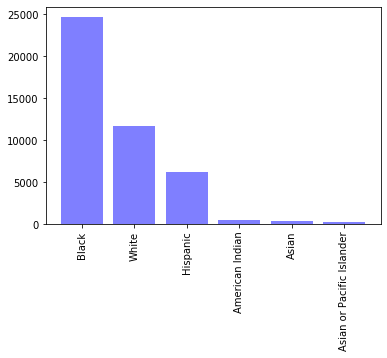

In [30]:
tick_loc = [value for value in x_axis]
plt.xticks(tick_loc,Race_count.index,rotation='vertical')
plt.bar(x_axis,deaths_by_race,color='b',alpha=0.5,align='center')

In [31]:
grp_race_homicide_2015 = grp_race_homicide[grp_race_homicide['Data_Year']==2015]
grp_race_homicide_2016 = grp_race_homicide[grp_race_homicide['Data_Year']==2016]
grp_race_homicide_2017 = grp_race_homicide[grp_race_homicide['Data_Year']==2017]
grp_race_homicide_2015.head()

,Unnamed: 0,Unnamed: 0.1,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,...,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10,Race-Simplified,ICD10-Description
3,3,3,Inter_state_NR,January,F,23,15 - 24,Outpatient Hospital,S,Tuesday,...,N,Homicide,Other Activity,Home,Black,Non - Hispanic black,Assault (homicide) by discharge of firearms,X95,Black,X95
5,5,5,Residents,January,M,18,15 - 24,Outpatient Hospital,S,Sunday,...,N,Homicide,Other Activity,Other Places,White,Non - Hispanic white,Assault (homicide) by discharge of firearms,X95,White,X95
7,7,7,Residents,January,M,20,15 - 24,Other,S,Thursday,...,N,Homicide,Other Activity,Other Places,White,Puerto Rican,Assault (homicide) by discharge of firearms,X95,Hispanic,X95
11,11,11,Inter_state_NR,February,M,33,25 - 34,Other,M,Sunday,...,N,Homicide,Other Activity,Other Places,White,Mexican,Assault (homicide) by discharge of firearms,X95,Hispanic,X95
18,18,18,Inter_state_NR,February,M,34,25 - 34,Other,M,Thursday,...,N,Homicide,Other Activity,Home,White,Non - Hispanic white,Assault (homicide) by discharge of firearms,X95,White,X95


In [32]:
Race_count_2015 = grp_race_homicide_2015['Race-Simplified'].value_counts()
deaths_by_race_2015 = []
#race_index = []
for i in Race_count_2015:
    deaths_by_race_2015.append(i)
Race_count_2016 = grp_race_homicide_2016['Race-Simplified'].value_counts()
deaths_by_race_2016 = []
#race_index = []
for i in Race_count_2016:
    deaths_by_race_2016.append(i)
Race_count_2017 = grp_race_homicide_2017['Race-Simplified'].value_counts()
deaths_by_race_2017 = []
#race_index = []
for i in Race_count_2017:
    deaths_by_race_2017.append(i)

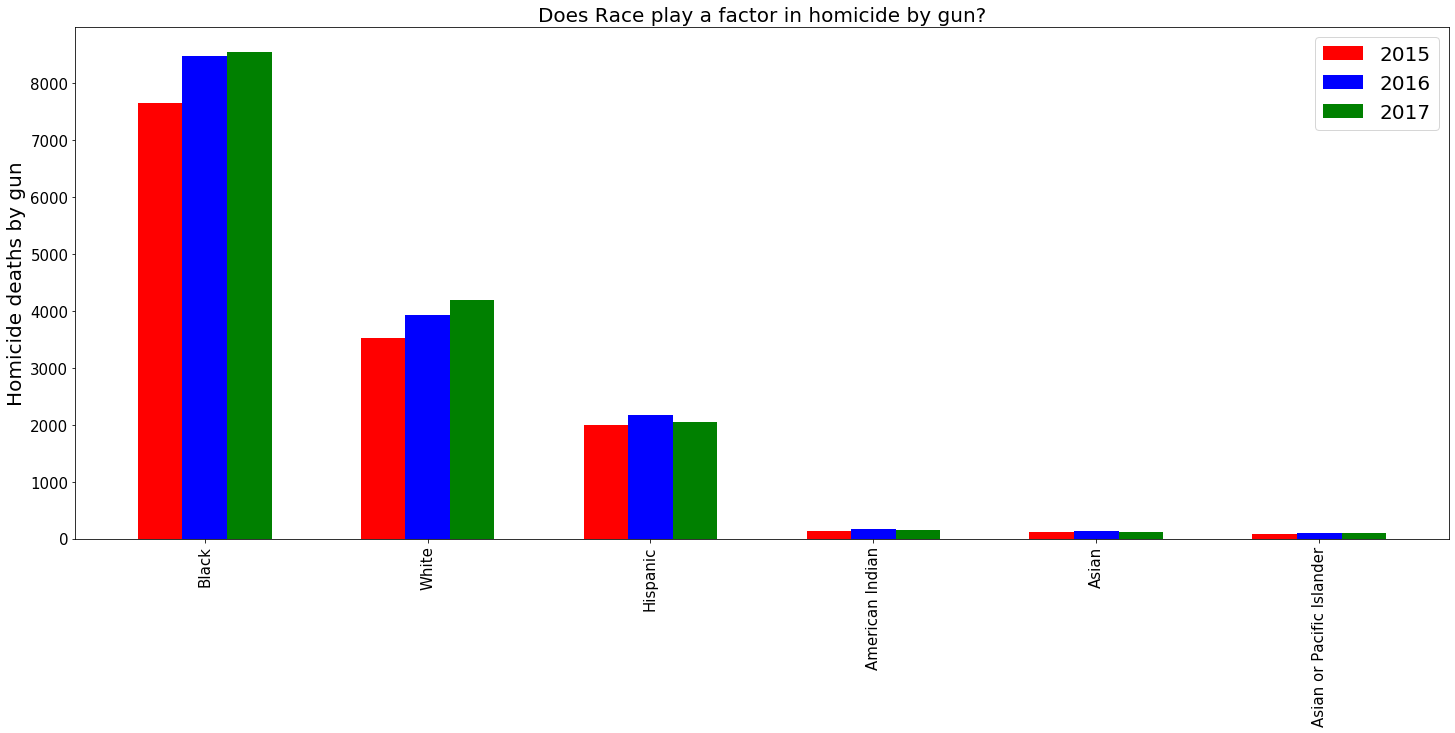

In [33]:
#np.arange(int(unqrace.size))

x = np.arange(int(unqrace.size))  # the label locations
pos=.20
width = .33

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - pos, deaths_by_race_2015, .20, label='2015',color='r')
rects2 = ax.bar(x, deaths_by_race_2016, .20, label='2016', color='b')
rects3 = ax.bar(x+pos, deaths_by_race_2017,0.20, label='2017', color='g')
ax.legend()
plt.xticks(tick_loc,Race_count.index,fontsize=15,rotation='vertical')
plt.yticks(fontsize=15)
fig.tight_layout()
plt.ylabel('Homicide deaths by gun',fontsize=20)
plt.title('Does Race play a factor in homicide by gun?',fontsize=20)
#plt.figure(figsize=(80,10))
plt.legend(loc=1, prop={'size': 20})
plt.savefig("Is_Race_a_factor_in_homicide.png",bbox_inches = 'tight', dpi = 200)
plt.show()

In [34]:
death_by_day_temp = df[df['DOW_of_Death'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])]
#death_by_day = death_by_day_temp['DOW_of_Death'].value_counts(sort=False)
death_by_day = death_by_day_temp['DOW_of_Death'].value_counts()
days = []
death_count = []
days = death_by_day.index 
#death_count = death_by_day
df_death_by_day = pd.DataFrame(death_by_day)
df_death_by_day['day-No'] = [0,1,2,6,3,5,4] 
df_death_by_day = df_death_by_day.sort_values(by=['day-No'])
df_death_by_day
days= df_death_by_day.index
death_count = df_death_by_day['DOW_of_Death'].tolist()
death_count

[17782, 17260, 16488, 15921, 15642, 15814, 16129]

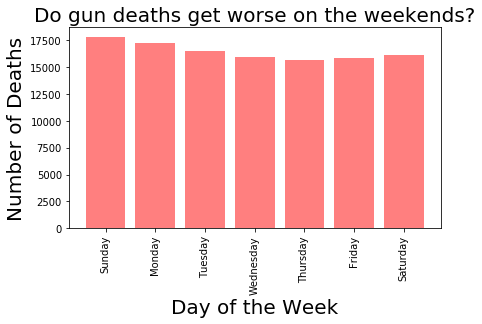

In [35]:
plt.xticks(rotation='vertical')
plt.bar(days,death_count,color='r',alpha=0.5,align='center')
plt.tight_layout()
plt.ylabel('Number of Deaths',fontsize=20)
plt.xlabel('Day of the Week',fontsize=20)
plt.title('Do gun deaths get worse on the weekends?',fontsize=20)
plt.savefig("Death_by_days.png",bbox_inches = 'tight', dpi = 200)

#tick_loc

In [36]:
df['Causes_of_Death'].value_counts()

suicide by firearms                            68908
Assault (homicide) by discharge of firearms    42064
legal intervention                              1629
Accidental discharge of firearms                1472
Discharge of firearms                            923
Legal intervention                                69
Name: Causes_of_Death, dtype: int64

In [37]:
# The statistical module used to run chi square test
import scipy.stats as stats

In [38]:
# Observed data in a (hypothetical) survey of 6000 people 
observed = pd.Series(death_count, index=[0,1,2,3,4,5,6])

In [39]:
# Create a data frame
df = pd.DataFrame([observed]).T
df.columns = ['Expected']
df['Observed'] = df['Expected'].mean()

In [40]:
df.columns = ['Observed','Expected']
df

,Observed,Expected
0,17782,16433.714286
1,17260,16433.714286
2,16488,16433.714286
3,15921,16433.714286
4,15642,16433.714286
5,15814,16433.714286
6,16129,16433.714286


In [41]:
# Calculate the critical value
# The degree of freedom is 7-1 = 6
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 6)

In [42]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df['Observed'], df['Expected'])

Power_divergenceResult(statistic=235.50083452136724, pvalue=5.1276058121128856e-48)

# Conclusion Since the chi square value of 235.50 exceeds the critical value of 12.59, we conclude that the results are statistically significant.

# Bhumika's Work

In [43]:
#Read the csv datafile
mort_data=pd.read_csv('Cleaned-gun-deaths.csv')
mort_df=pd.DataFrame(mort_data)
mort_df.head()

,Unnamed: 0,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,Data_Year,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10
0,0,Residents,January,M,48,45 - 54,Decendents Home,M,Saturday,2015,N,Suicide,Other Activity,Home,White,Non - Hispanic white,suicide by firearms,suicide
1,1,Residents,January,F,19,15 - 24,Other,S,Tuesday,2015,N,Suicide,Other Activity,Other Places,White,Non - Hispanic white,suicide by firearms,suicide
2,2,Residents,January,M,33,25 - 34,Decendents Home,M,Sunday,2015,N,Suicide,Other Activity,Home,White,Non - Hispanic white,suicide by firearms,suicide
3,3,Inter_state_NR,January,F,23,15 - 24,Outpatient Hospital,S,Tuesday,2015,N,Homicide,Other Activity,Home,Black,Non - Hispanic black,Assault (homicide) by discharge of firearms,Assault (homicide)
4,4,Residents,January,F,40,35 - 44,Other,D,Tuesday,2015,N,Suicide,Other Activity,Other Places,White,Non - Hispanic white,suicide by firearms,suicide


In [44]:
#check the mortality data by gender
mort_df.describe()
df_s=mort_df['Sex'].value_counts()

df_s

 M    98432
 F    16633
Name: Sex, dtype: int64

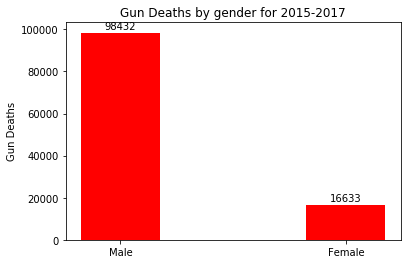

In [45]:
# #plotting the bar graph to show the gender based deaths
# death_cnt=mort_df.loc(mort_df['Sex']=='M').count()

#calculate the count for Gun deaths for the 3 years by gender
gender_death_cnt=[df_s[0],df_s[1]]
gender_death_cnt
gender=['Male','Female']

fig, ax = plt.subplots()

#define function to label the bars with counts
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
rect=ax.bar(gender, gender_death_cnt, color='r', width=0.35 , align="center")
autolabel(rect)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gun Deaths')
ax.set_title('Gun Deaths by gender for 2015-2017')
ax.set_xticks(gender)

plt.show()

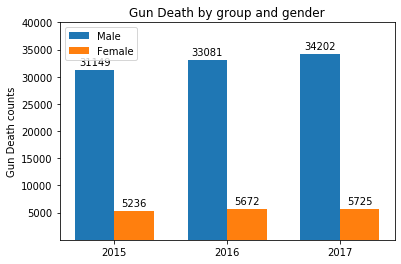

<Figure size 432x288 with 0 Axes>

In [46]:
#Plot a graph to show the yearly dividsion of gun deaths by gender

grp_data=mort_df.groupby(['Data_Year','Sex'])
death_cnts=grp_data['Data_Year'].count()

labels=['2015','2016','2017']
female_death_cnts=[death_cnts[0],death_cnts[2],death_cnts[4]]
male_death_cnts=[death_cnts[1],death_cnts[3],death_cnts[5]]

#death_cnts

# # Create a bar chart based off of the group series from before
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_death_cnts, width, label='Male')
rects2 = ax.bar(x + width/2, female_death_cnts, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gun Death counts')
ax.set_title('Gun Death by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()
ax.set_ylim(1,40000)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

# Create a legend for our chart
plt.legend(handles=[rects1, rects2], loc="best")


#fig.tight_layout()

plt.show()

plt.savefig('Bhumika_plot_images/Gun_deaths_byGender_2015-2017.png', dpi=200)

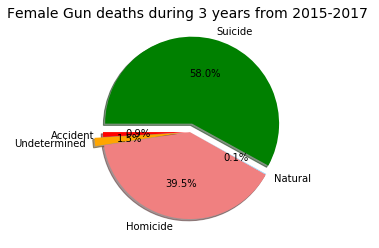

In [47]:
fig, ax2 = plt.subplots()

#plt.figure(figsize=(9, 3))

#plt.subplot(131)
group_data=mort_df.groupby(['Sex','Manner_Of_Death'])
death_manner_s_cnts=group_data['Sex'].count()
death_manner_s_cnts

undetermined=death_manner_s_cnts[1]+death_manner_s_cnts[4]+death_manner_s_cnts[6]
manner_of_death=['Accident','Undetermined','Homicide','Natural','Suicide']


female_acc_death=[death_manner_s_cnts[0],undetermined,death_manner_s_cnts[2],death_manner_s_cnts[3],death_manner_s_cnts[5]]
# male_acc_death=[death_manner_s_cnts[7],death_manner_s_cnts[8],death_manner_s_cnts[9],death_manner_s_cnts[10],death_manner_s_cnts[11],death_manner_s_cnts[12],,death_manner_s_cnts[13]]
#sizes=female_acc_death
explode = (0, 0.1, 0, 0,0.1,)
colors = ["red", "orange", "lightcoral", "lightskyblue","green","blue","yellow"]
ax2.pie(female_acc_death, explode=explode, labels=manner_of_death, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180,textprops={'fontsize': 10})

texts =ax2.set_title("Female Gun deaths during 3 years from 2015-2017 ")

texts.set_fontsize(14)
plt.savefig('Bhumika_plot_images/Female_Gun_deaths_2015-2017.png', dpi=200)

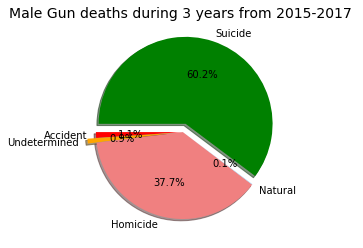

In [48]:
fig, ax3 = plt.subplots()

group_data=mort_df.groupby(['Sex','Manner_Of_Death'])
death_manner_s_cnts=group_data['Sex'].count()
death_manner_s_cnts

male_undetermined=death_manner_s_cnts[8]+death_manner_s_cnts[11]+death_manner_s_cnts[13]
manner_of_death=['Accident','Undetermined','Homicide','Natural','Suicide']

male_acc_death=[death_manner_s_cnts[7],male_undetermined,death_manner_s_cnts[9],death_manner_s_cnts[10],death_manner_s_cnts[12]]
#sizes=female_acc_death
explode = (0, 0.1, 0, 0,0.1,)
colors = ["red", "orange", "lightcoral", "lightskyblue","green","blue","yellow"]
ax3.pie(male_acc_death, explode=explode, labels=manner_of_death, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
texts=ax3.set_title("Male Gun deaths during 3 years from 2015-2017 ")
texts.set_fontsize(14)

plt.savefig('Bhumika_plot_images/male_Gun_deaths_2015-2017.png', dpi=200)

In [49]:
#check the yearly mortality data
mort_df.describe()
df_y=mort_df['Data_Year'].value_counts()

df_y[2017]

39927

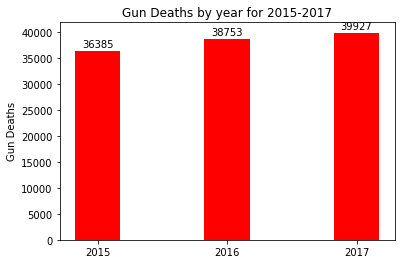

<Figure size 432x288 with 0 Axes>

In [50]:
yearly_death_cnt=[df_y[2015],df_y[2016],df_y[2017]]

year=[2015,2016,2017]

fig, ax = plt.subplots()

#define function to label the bars with counts
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
rect=ax.bar(year, yearly_death_cnt, color='r', width=0.35 , align="center")
autolabel(rect)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gun Deaths')
ax.set_title('Gun Deaths by year for 2015-2017')
ax.set_xticks(year)

plt.show()

plt.savefig('Bhumika_plot_images/Gun_Deaths_by_Year.png', dpi = 200)

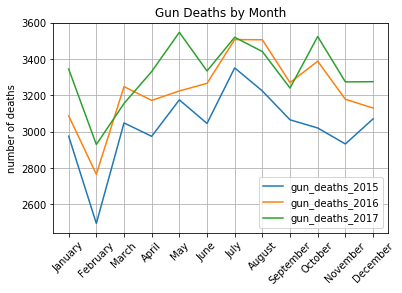

<Figure size 432x288 with 0 Axes>

In [72]:
#Plotting the yearly treand for gun deaths for each year to see if there is any particular time of the day when these 
#deaths increase

fig, ax2 = plt.subplots()

group_data=mort_df.groupby(['Data_Year','Month_Of_Death'])
death_manner_y_cnts=group_data['Data_Year'].count()
death_manner_y_cnts

death_manner_y_cnts
months=mort_df['Month_Of_Death'].unique()
months

#creating a list of death counts for each month of the year
deaths_2015=[death_manner_y_cnts[4],death_manner_y_cnts[3],death_manner_y_cnts[7],death_manner_y_cnts[0],death_manner_y_cnts[8],death_manner_y_cnts[6],death_manner_y_cnts[5],death_manner_y_cnts[1],death_manner_y_cnts[11],death_manner_y_cnts[10],death_manner_y_cnts[9],death_manner_y_cnts[2]]
deaths_2016=[death_manner_y_cnts[16],death_manner_y_cnts[15],death_manner_y_cnts[19],death_manner_y_cnts[12],death_manner_y_cnts[20],death_manner_y_cnts[18],death_manner_y_cnts[17],death_manner_y_cnts[13],death_manner_y_cnts[23],death_manner_y_cnts[22],death_manner_y_cnts[21],death_manner_y_cnts[14]]
deaths_2017=[death_manner_y_cnts[28],death_manner_y_cnts[27],death_manner_y_cnts[31],death_manner_y_cnts[24],death_manner_y_cnts[32],death_manner_y_cnts[30],death_manner_y_cnts[29],death_manner_y_cnts[25],death_manner_y_cnts[35],death_manner_y_cnts[34],death_manner_y_cnts[33],death_manner_y_cnts[26]]

#plotting line for each year
line1,=plt.plot(months,deaths_2015,label='gun_deaths_2015')
line2,=plt.plot(months,deaths_2016,label='gun_deaths_2016')
line3,=plt.plot(months,deaths_2017,label='gun_deaths_2017')
ax2.set_title('Gun Deaths by Month')
plt.ylabel('number of deaths')
plt.xticks(months,rotation=45)
plt.subplots_adjust(bottom=0.15)
plt.grid()
plt.legend()
plt.show()

plt.savefig('Bhumika_plot_images/Gun_Deaths_by_Months.png', dpi = 200)
#The plot shows that the Gun deaths peak during the summer months.For the year 2015 and 2016 ,the counts peaked around July



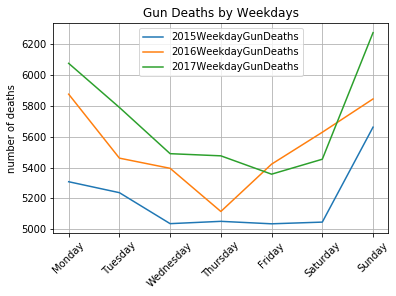

<Figure size 432x288 with 0 Axes>

In [73]:
group_data=mort_df.groupby(['Data_Year','DOW_of_Death'])
weekday_death_cnts=group_data['Data_Year'].count()
weekday_death_cnts

fig, ax3 = plt.subplots()

weeks=['Monday','Tuesday','Wednesday','Thursday',  'Friday' ,'Saturday',  'Sunday']
weeks

#creating a list of death counts for each month of the year
weekday_deaths_2015=[weekday_death_cnts[1],weekday_death_cnts[5],weekday_death_cnts[7],weekday_death_cnts[4],weekday_death_cnts[0],weekday_death_cnts[2],weekday_death_cnts[3]]
weekday_deaths_2016=[weekday_death_cnts[9],weekday_death_cnts[13],weekday_death_cnts[15],weekday_death_cnts[12],weekday_death_cnts[8],weekday_death_cnts[10],weekday_death_cnts[11]]
weekday_deaths_2017=[weekday_death_cnts[17],weekday_death_cnts[21],weekday_death_cnts[23],weekday_death_cnts[20],weekday_death_cnts[16],weekday_death_cnts[18],weekday_death_cnts[19]]

#plotting line for each year
line1,=plt.plot(weeks,weekday_deaths_2015,label='2015WeekdayGunDeaths')
line2,=plt.plot(weeks,weekday_deaths_2016,label='2016WeekdayGunDeaths')
line3,=plt.plot(weeks,weekday_deaths_2017,label='2017WeekdayGunDeaths')
ax3.set_title('Gun Deaths by Weekdays')
plt.ylabel('number of deaths')
plt.xticks(weeks,rotation=45)
plt.subplots_adjust(bottom=0.15)
plt.grid()
plt.legend()
plt.show()

plt.savefig('Bhumika_plot_images/Gun_Deaths_by_Weekdays.png', dpi = 200)
#The plot show increase in gun deaths on Sunday and Thursday and Friday has the least deaths among all weekdays.

In [51]:
# Imran's Work

In [52]:
# Read the cleaned CSV file
guns15_17 = pd.read_csv("Recoded-Race.csv", low_memory=False)

In [53]:
# Review the data
guns15_17.head()

,Unnamed: 0,Unnamed: 0.1,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,...,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10,Race-Simplified,ICD10-Description
0,0,0,Residents,January,M,48,45 - 54,Decendents Home,M,Saturday,...,N,Suicide,Other Activity,Home,White,Non - Hispanic white,suicide by firearms,X72,White,X72
1,1,1,Residents,January,F,19,15 - 24,Other,S,Tuesday,...,N,Suicide,Other Activity,Other Places,White,Non - Hispanic white,suicide by firearms,X72,White,X72
2,2,2,Residents,January,M,33,25 - 34,Decendents Home,M,Sunday,...,N,Suicide,Other Activity,Home,White,Non - Hispanic white,suicide by firearms,X74,White,X74
3,3,3,Inter_state_NR,January,F,23,15 - 24,Outpatient Hospital,S,Tuesday,...,N,Homicide,Other Activity,Home,Black,Non - Hispanic black,Assault (homicide) by discharge of firearms,X95,Black,X95
4,4,4,Residents,January,F,40,35 - 44,Other,D,Tuesday,...,N,Suicide,Other Activity,Other Places,White,Non - Hispanic white,suicide by firearms,X72,White,X72


In [54]:
# Perform some more data cleanup Rename American Indian to NAtive American and group Asian and Asian or Pacific Islander into one
guns15_17['Causes_of_Death'] = guns15_17['Causes_of_Death'].str.lower()
guns15_17.replace({'American Indian': 'Native American'}, inplace=True)
guns15_17.replace({'Asian': 'Asian or Pacific Islander'}, inplace=True)

In [55]:
#Check data
guns15_17.count()

Unnamed: 0                115065
Unnamed: 0.1              115065
Resident_Status           115065
Month_Of_Death            115065
Sex                       115065
Age                       115065
Age_Group                 115065
Place_Of_Death            115065
Marital_Status            115065
DOW_of_Death              115065
Data_Year                 115065
Injured_At_Work           115065
Manner_Of_Death           115008
Activity_Code             113381
Place_Of_Causal_Injury    113450
Race                      115065
Hispanic_Origin           115065
Causes_of_Death           115065
ICD10                     115065
Race-Simplified           115065
ICD10-Description         115065
dtype: int64

In [56]:
# Perform a groupby race
guns15_17byrace = guns15_17.groupby(['Race-Simplified'])


In [57]:
# Get total gun deaths by race
totalbyrace = guns15_17byrace['Race-Simplified'].count()
dftotalbyrace = pd.DataFrame(totalbyrace)
dftotalbyrace.columns = ['Totals']
dftotalbyrace


,Totals
Race-Simplified,
Asian or Pacific Islander,1712
Black,29165
Hispanic,9846
Native American,1169
White,73173


In [58]:
# Get breakdown of deaths by race by causes
guns15_17bybd = guns15_17byrace["Causes_of_Death"].value_counts()
guns15_17bybd

Race-Simplified            Causes_of_Death                            
Asian or Pacific Islander  suicide by firearms                             1007
                           assault (homicide) by discharge of firearms      633
                           legal intervention                                41
                           accidental discharge of firearms                  21
                           discharge of firearms                             10
Black                      assault (homicide) by discharge of firearms    24315
                           suicide by firearms                             3960
                           legal intervention                               389
                           accidental discharge of firearms                 311
                           discharge of firearms                            190
Hispanic                   assault (homicide) by discharge of firearms     5952
                           suicide by firearms   

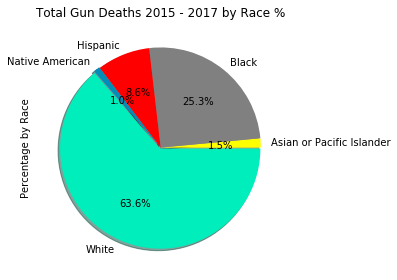

In [59]:
# Plot percantage of total deaths by race
totalraceplot = totalbyrace.plot.pie( shadow=True, explode=(0,0,0,0.01,0.01), colors = ['yellow', 'gray', 'red', '#008DB8', '#00EEBB'], autopct='%1.1f%%') 
plt.ylabel('Percentage by Race')
plt.title("Total Gun Deaths 2015 - 2017 by Race %")
plt.tight_layout()
plt.savefig('imran_plot-images/totalgun_deaths_by_race_2015-2017-bar.png')

In [60]:
# Filter gun deaths by Legal Intervention 
guns15_17byLI = guns15_17.loc[guns15_17['Causes_of_Death']=="legal intervention"]

In [61]:
guns15_17byLI.head()

,Unnamed: 0,Unnamed: 0.1,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,...,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10,Race-Simplified,ICD10-Description
129,129,129,Residents,September,M,33,25 - 34,Other,S,Wednesday,...,N,Homicide,NaN,NaN,Native American,Non - Hispanic other races,legal intervention,Y350,Native American,Y350
142,142,142,Residents,October,M,49,45 - 54,Other,D,Saturday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
279,279,279,Residents,February,M,46,45 - 54,Other,S,Wednesday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
628,628,628,Intra_state_NR,June,F,40,35 - 44,Other,M,Wednesday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
770,770,770,Intra_state_NR,August,M,36,35 - 44,Other,S,Sunday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350


In [62]:
# Filter Legal Intervention by race
guns15_17byLIbyrace= guns15_17byLI.groupby(['Race-Simplified'])
racecount = guns15_17byLIbyrace['Race-Simplified'].count()
guns15_17byLIbyrace.head(10)

,Unnamed: 0,Unnamed: 0.1,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,...,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10,Race-Simplified,ICD10-Description
129,129,129,Residents,September,M,33,25 - 34,Other,S,Wednesday,...,N,Homicide,NaN,NaN,Native American,Non - Hispanic other races,legal intervention,Y350,Native American,Y350
142,142,142,Residents,October,M,49,45 - 54,Other,D,Saturday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
279,279,279,Residents,February,M,46,45 - 54,Other,S,Wednesday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
628,628,628,Intra_state_NR,June,F,40,35 - 44,Other,M,Wednesday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
770,770,770,Intra_state_NR,August,M,36,35 - 44,Other,S,Sunday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
823,823,823,Residents,September,M,57,55 - 64,Unknown,M,Friday,...,N,Homicide,Other Activity,Street and Highway,White,Non - Hispanic white,legal intervention,Y350,White,Y350
1402,1402,1402,Residents,July,M,49,45 - 54,Decendents Home,D,Tuesday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
1616,1616,1616,Residents,May,M,42,35 - 44,Outpatient Hospital,M,Friday,...,Y,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
1714,1714,1714,Intra_state_NR,January,M,29,25 - 34,Outpatient Hospital,M,Tuesday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350
1745,1745,1745,Residents,February,M,55,55 - 64,Other,M,Monday,...,N,Homicide,NaN,NaN,White,Non - Hispanic white,legal intervention,Y350,White,Y350


In [63]:
# Display Legal interventions death totals by race
guns15_17LIbybd = guns15_17byLIbyrace["Causes_of_Death"].value_counts()
dfguns15_17LIbybd = pd.DataFrame(guns15_17LIbybd)
dfguns15_17LIbybd.columns = ['Totals']
dfguns15_17LIbybd

,,Totals
Race-Simplified,Causes_of_Death,
Asian or Pacific Islander,legal intervention,41
Black,legal intervention,389
Hispanic,legal intervention,259
Native American,legal intervention,51
White,legal intervention,958


In [64]:
# Calculate legal interventions deaths by race by percentage of totals by race
percentLioftotalbyrace = (guns15_17LIbypa/totalbyrace*100).round(2)
dfpercentLioftotalbyrace = pd.DataFrame(percentLioftotalbyrace)
dfpercentLioftotalbyrace.columns = ['% of total deaths']
dfpercentLioftotalbyrace

NameError: name 'guns15_17LIbypa' is not defined

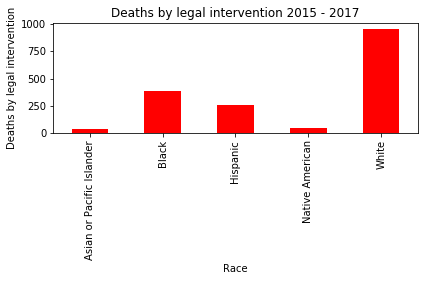

In [65]:
# Plot deaths by Legal Intervention by race
lichart = racecount.plot(kind='bar', color='red')
lichart.set_xlabel("Race")
lichart.set_ylabel("Deaths by legal intervention")
plt.title("Deaths by legal intervention 2015 - 2017")
plt.tight_layout()
plt.savefig('imran_plot-images/legalinterventions_deaths_2015-2017-bar.png')

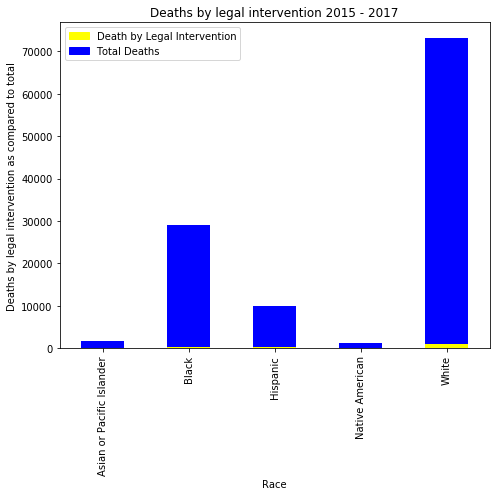

In [66]:
# Plot deaths by Legal Intervention by race compared to tals gun deaths
totalichart = totalbyrace.plot(kind='bar',figsize=(7,7), color='blue')
lichart = racecount.plot(kind='bar', color='Yellow')
lichart.set_xlabel("Race")
lichart.set_ylabel("Deaths by legal intervention as compared to total")
yellow_patch = mpatches.Patch(color='yellow', label='Death by Legal Intervention')
blue_patch = mpatches.Patch(color='blue', label='Total Deaths')
plt.legend(handles=[yellow_patch, blue_patch])
plt.title("Deaths by legal intervention 2015 - 2017")
plt.tight_layout()
plt.savefig('imran_plot-images/pct-legalinterventions_deaths_2015-2017-bar.png')

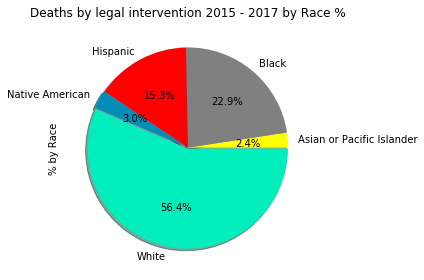

In [67]:
# Percentage breakdown of total police intervention deaths by race
piechartbyrace = racecount.plot.pie(shadow=True, explode=(0,0,0,0.01,0.01), colors = ['yellow','gray','red','#008DB8','#00EEBB'], autopct='%1.1f%%') 
plt.ylabel('% by Race')
plt.title("Deaths by legal intervention 2015 - 2017 by Race %")
plt.tight_layout()
plt.savefig('imran_plot-images/legalinterventions_deaths_2015-2017-pie.png')